## Project Assignment A (Analysis of the data)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ts_data = pd.read_csv('data/taylor_swift_discography_updated.csv', sep=';', index_col = 'ID')
ts_data.head()

,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,album,...,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
ID,,,,,,,,,,,,,,,,,,,,,
0,Fortnight (feat. Post Malone),Synth Pop,Single,228965,Post Malone,No,0,648525069,1,The Tortured Poets Department: The Anthology,...,spotify:track:6dODwocEuGzHAavXqTbwHv,0.5020,0.504,0.386,1.53e-05,0.0961,-10.976,0.0308,192.004,0.281
1,The Tortured Poets Department,Synth Pop,B-Side,293048,No,No,0,206954130,6,The Tortured Poets Department: The Anthology,...,spotify:track:4PdLaGZubp4lghChqp8erB,0.0483,0.604,0.428,0.0,0.1260,-8.441,0.0255,110.259,0.292
2,My Boy Only Breaks His Favorite Toys,Synth Pop,B-Side,203801,No,No,0,238016975,7,The Tortured Poets Department: The Anthology,...,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.1370,0.596,0.563,0.0,0.3020,-7.362,0.0269,97.073,0.481
3,Down Bad,R&B,B-Side,261228,No,No,0,318375377,2,The Tortured Poets Department: The Anthology,...,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.5600,0.541,0.366,"1,00E-06",0.0946,-10.412,0.0748,159.707,0.168
4,"So Long, London",Synth Pop,B-Side,262974,No,No,0,253712712,4,The Tortured Poets Department: The Anthology,...,spotify:track:7wAkQFShJ27V8362MqevQr,0.7300,0.423,0.533,0.00264,0.0816,-11.388,0.3220,160.218,0.248


In [4]:
#print the number of albums and their names
print('Number of albums:', ts_data['album'].nunique())

Number of albums: 29


In [5]:
#print size of the dataset
rows, columns = ts_data.shape
print('Number of rows: ', rows)
print('Number of columns: ', columns)

Number of rows:  577
Number of columns:  27


In [6]:
# print songs with repeated names and their count
print(ts_data['track_name'].value_counts())


track_name
illicit affairs                         3
Holy Ground                             3
mad woman                               3
epiphany                                3
betty                                   3
                                       ..
I Forgot That You Existed               1
Cruel Summer                            1
Lover                                   1
The Man                                 1
Teardrops on My Guitar - Pop Version    1
Name: count, Length: 361, dtype: int64


In [7]:
# print name of columns
print(ts_data.columns)

Index(['track_name', 'track_musical_genre', 'track_type', 'duration_ms',
       'feature', 'track_videoclip', 'videoclip_views', 'spotify_streams',
       'spotify_global_peak', 'album', 'track_number', 'album_musical_genre',
       'album_type', 'release_date', 'album_physical_sales', 'track_lyrics',
       'track_theme', 'uri', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')


In [8]:
ts_data['release_date'].head()

ID
0    19/4/2024
1    19/4/2024
2    19/4/2024
3    19/4/2024
4    19/4/2024
Name: release_date, dtype: object

In [9]:
#transform the column 'release_date' to datetime
ts_data['release_date'] = pd.to_datetime(ts_data['release_date'], format='%d/%m/%Y')

In [10]:
#transform the column 'spotify_streams' to int
#first you have to replace the . by nothing
ts_data['spotify_streams'] = ts_data['spotify_streams'].str.replace('.', '')
ts_data['spotify_streams'] = pd.to_numeric(ts_data['spotify_streams'], errors='coerce')

In [19]:
ts_data['album']

ID
0      The Tortured Poets Department: The Anthology
1      The Tortured Poets Department: The Anthology
2      The Tortured Poets Department: The Anthology
3      The Tortured Poets Department: The Anthology
4      The Tortured Poets Department: The Anthology
                           ...                     
572                                    Taylor Swift
573                                    Taylor Swift
574                                    Taylor Swift
575                                    Taylor Swift
576                                    Taylor Swift
Name: album, Length: 577, dtype: object

/var/folders/x1/r0lcq37s2gv_b_dbmtl4lrx40000gn/T/ipykernel_4320/4257909736.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent cutting off labels


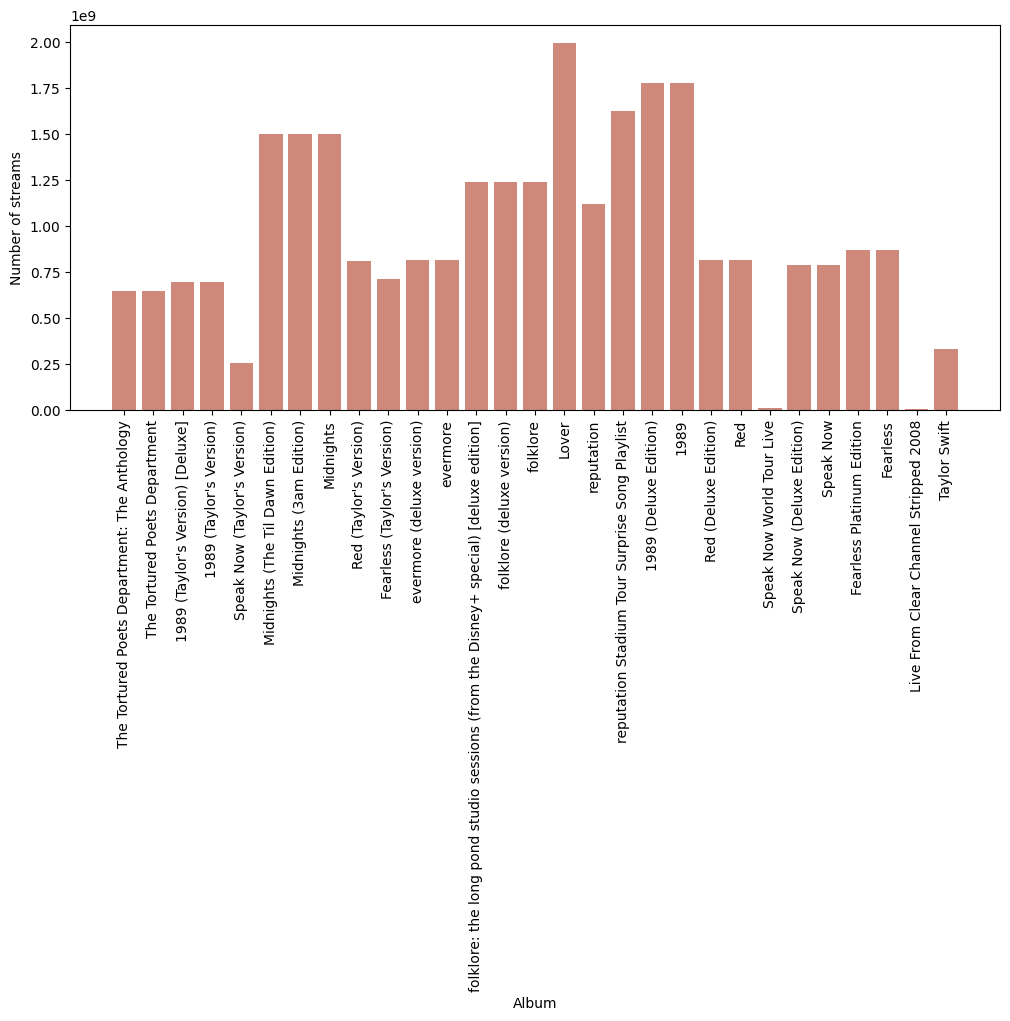

In [12]:
#number of streams per album
# ts_data.groupby('album')['spotify_streams'].sum().plot(kind='bar')
plt.figure(figsize=(12, 5))
plt.bar(ts_data['album'], ts_data['spotify_streams'], color='#cf897a')  # Darker pink color
plt.xticks(rotation=90)
# plt.title('Number of streams per album')
plt.ylabel('Number of streams')
plt.xlabel('Album')
plt.tight_layout()  # Adjust layout to prevent cutting off labels
# plt.savefig('plots/streams_per_album.png')
plt.show()


In [13]:
# total number of spotify streams
ts_data['spotify_streams'].sum()

np.int64(143460832279)

numero de albumes y generos

Number of genres: 18
['Synth Pop' 'R&B' 'Pop Rock' 'Indie Rock' 'Indie Pop' 'Folk Pop'
 'Electropop' 'Country Pop' 'Dance Pop' 'Dream Pop' 'Pop' 'Pop Rock '
 'Alternative Rock' 'Indie Folk' 'Pop  ' 'Funk Pop' 'Country' 'Country  ']


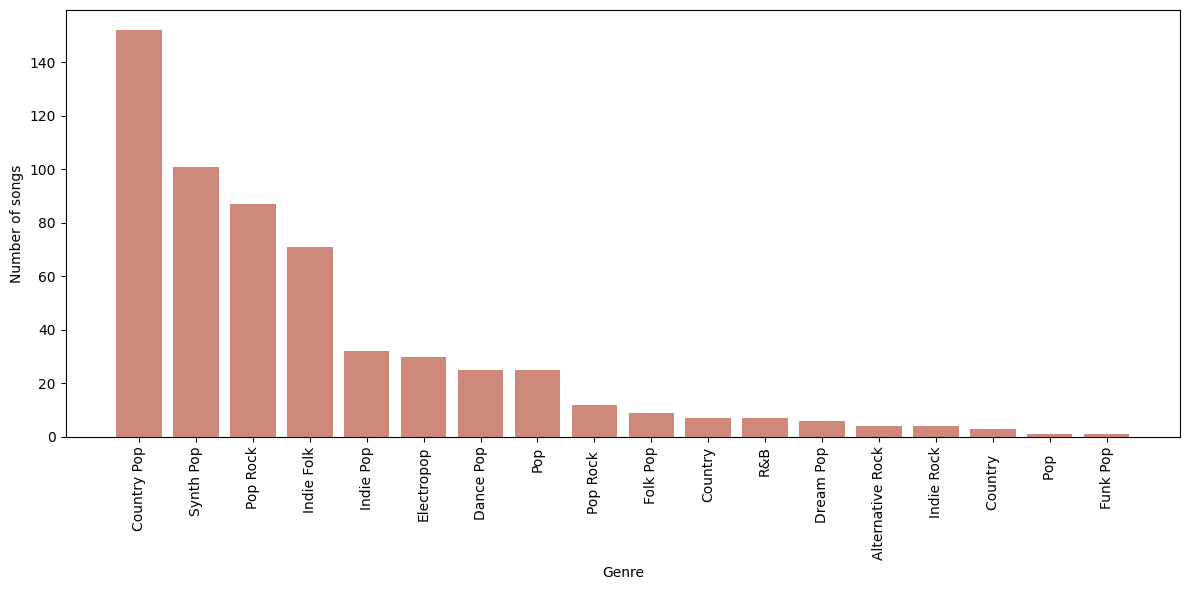

In [14]:
# how many genres and list them
print('Number of genres:', ts_data['track_musical_genre'].nunique())
print(ts_data['track_musical_genre'].unique())

# number of songs per genre plot
# ts_data['track_musical_genre'].value_counts().plot(kind='bar')
plt.figure(figsize=(12, 6))
plt.bar(ts_data['track_musical_genre'].value_counts().index, ts_data['track_musical_genre'].value_counts().values, color='#cf897a')  # Darker pink color
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of songs')
# plt.title('Number of songs per genre')
plt.tight_layout()  # Adjust layout to prevent cutting off labels
# plt.savefig('plots/songs_per_genre.png')
plt.show()


/var/folders/x1/r0lcq37s2gv_b_dbmtl4lrx40000gn/T/ipykernel_4320/1263896344.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent cutting off labels


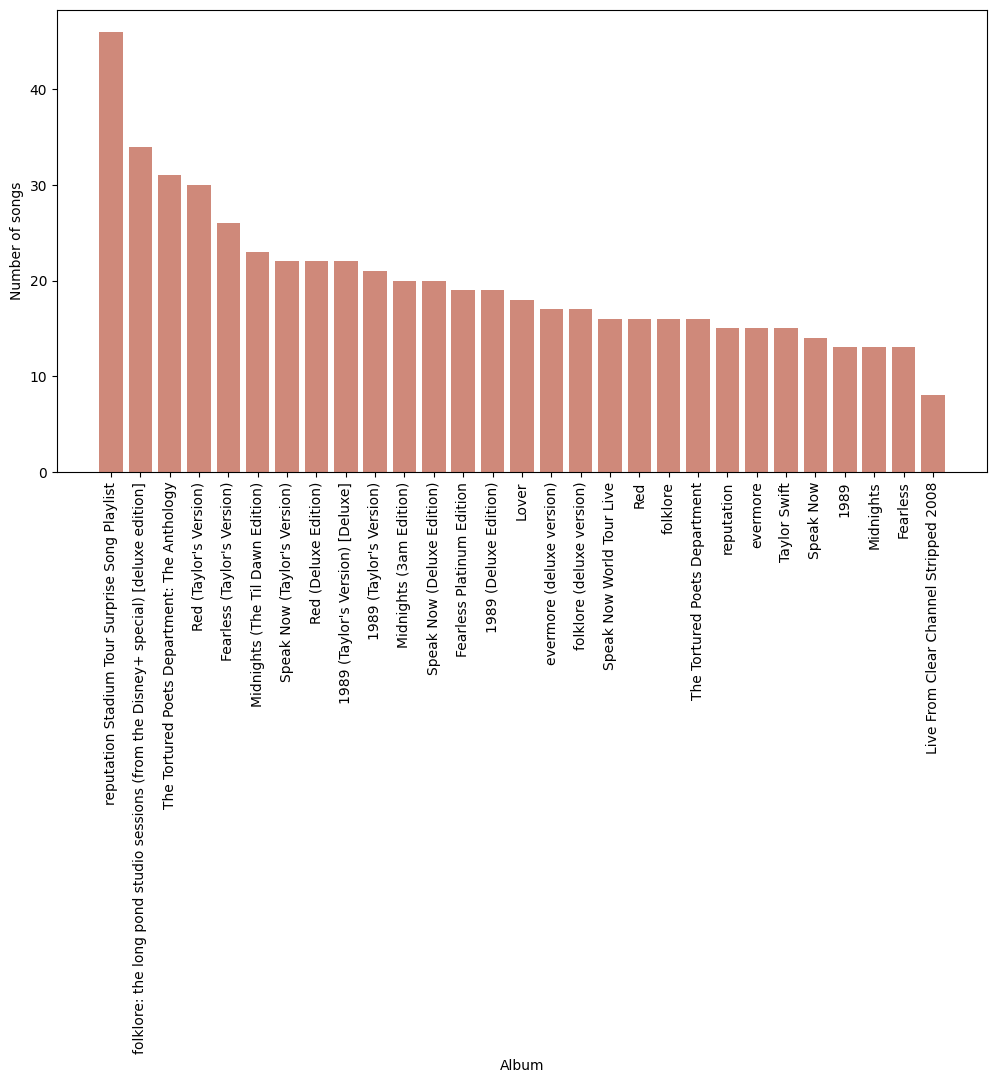

In [15]:
# number of songs per album
plt.figure(figsize=(12, 6))
plt.bar(ts_data['album'].value_counts().index, ts_data['album'].value_counts().values, color='#cf897a')  # Darker pink color
plt.xticks(rotation=90)
plt.xlabel('Album')
plt.ylabel('Number of songs')
plt.tight_layout()  # Adjust layout to prevent cutting off labels
# plt.savefig('plots/songs_per_album.png')
plt.show()

/var/folders/x1/r0lcq37s2gv_b_dbmtl4lrx40000gn/T/ipykernel_4320/3979053740.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent cutting off labels


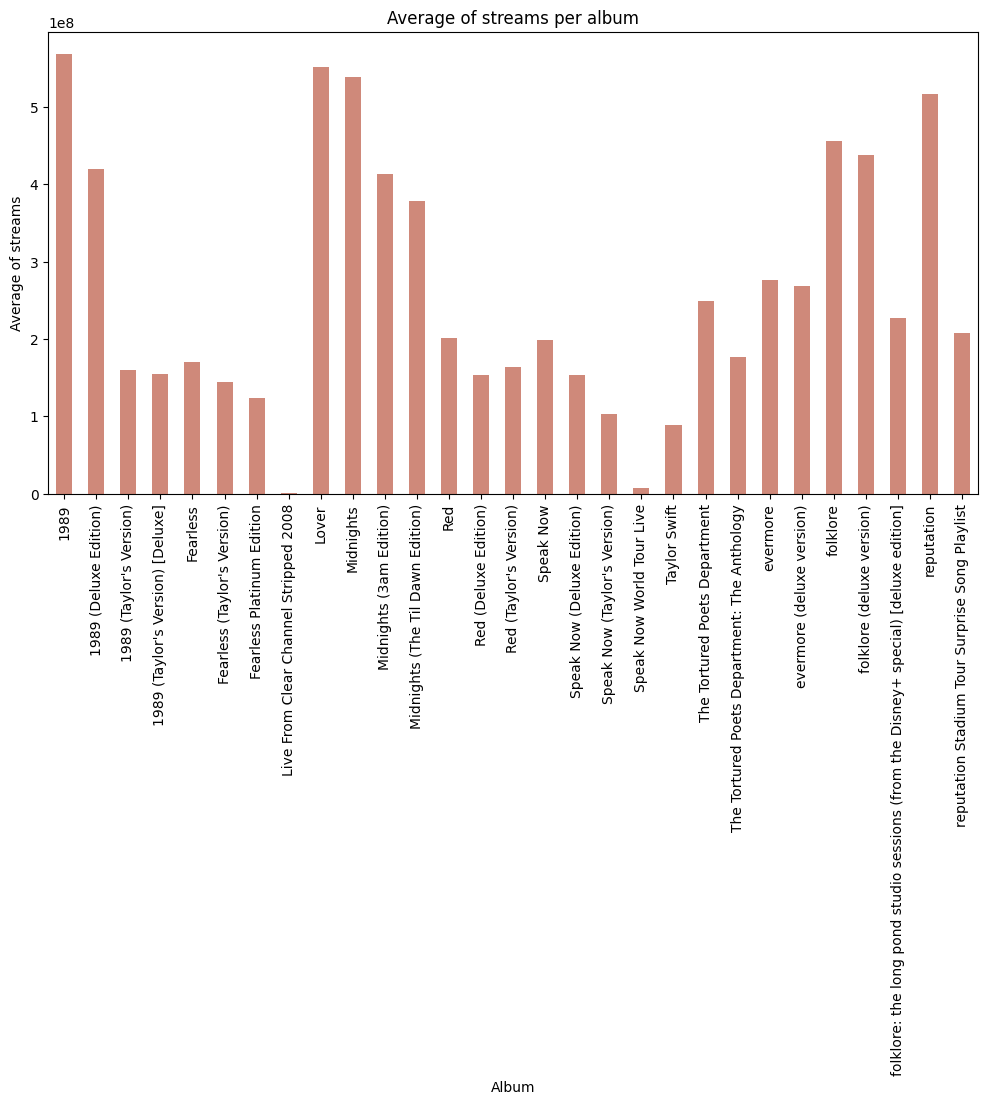

In [16]:
# average of streams per album
plt.figure(figsize=(12, 6))
ts_data.groupby('album')['spotify_streams'].mean().plot(kind='bar', color='#cf897a')  # Darker pink color
plt.xticks(rotation=90)
plt.xlabel('Album')
plt.ylabel('Average of streams')
plt.title('Average of streams per album')
plt.tight_layout()  # Adjust layout to prevent cutting off labels
# plt.savefig('plots/average_streams_per_album.png')
plt.show()

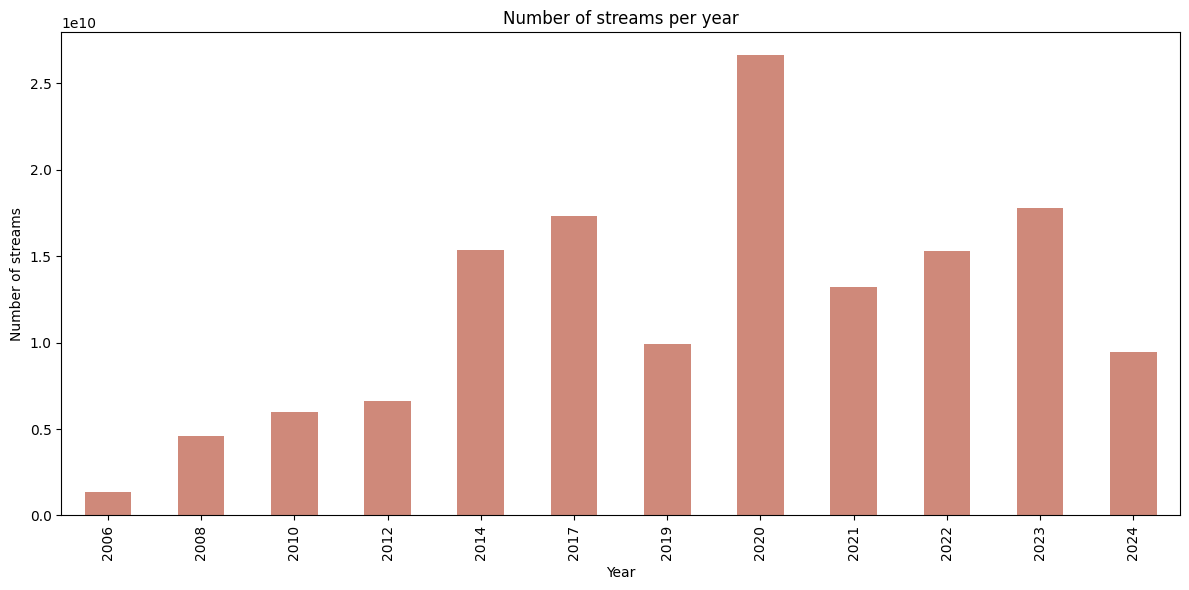

In [17]:
# average of streams per year taking into account how many songs were released that year
plt.figure(figsize=(12, 6))
ts_data.groupby(ts_data['release_date'].dt.year)['spotify_streams'].sum().plot(kind='bar', color='#cf897a')  # Darker pink color
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of streams')
plt.title('Number of streams per year')
plt.tight_layout()  # Adjust layout to prevent cutting off labels
# plt.savefig('plots/streams_per_year.png')
plt.show()

In [18]:
# check which songs are repeated and how many times
repeated_songs = ts_data['track_name'].value_counts()
repeated_songs_2 = repeated_songs[repeated_songs == 2]
repeated_songs_3 = repeated_songs[repeated_songs == 3]

print('This number of songs were repeated:', len(repeated_songs_2) + len(repeated_songs_3))
print('This number of songs were released twice:', len(repeated_songs_2))
print('This number of songs werec released three times:', len(repeated_songs_3))



This number of songs were repeated: 156
This number of songs were released twice: 96
This number of songs werec released three times: 60
